<b>Question 1

<b>Question 2

<function matplotlib.pyplot.show(close=None, block=None)>

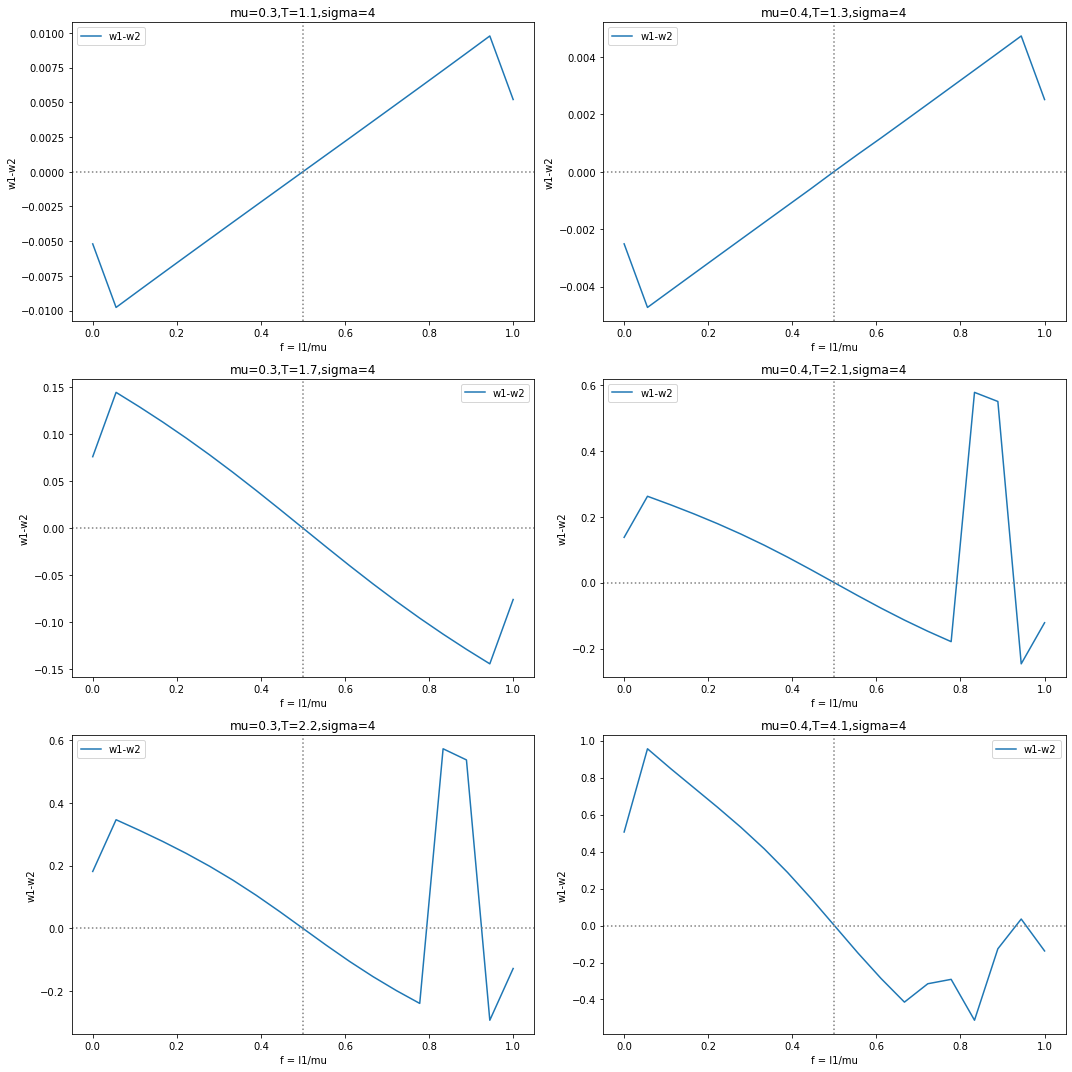

In [60]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.optimize import minimize
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)


def equations(variables, mu, tau, sigma, l1, l2):
    w1, w2, z11, z12, y1, y2 = variables
    
    f1 = z11 - ((l1/l2)*(((w1*tau)/w2)**(1-sigma)))
    f2 = z12 - ((l1/l2)*(((w1)/(w2*tau))**(1-sigma)))
    f3 = w1*l1 - (mu*(((z11/(1+z11))*y1)+((z12/(1+z12))*y2)))
    f4 = w2*l2 - (mu*(((1/(1+z11))*y1)+((1/(1+z12))*y2)))
    f5 = y1 - (((1-mu)/2) + (w1*l1))
    f6 = y2 - (((1-mu)/2) + (w2*l2))
    return np.array([f1, f2, f3, f4, f5, f6])





def solve_eqns(mu, tau, sigma, l1, l2,x0):
    args = (mu, tau, sigma, l1, l2)
    solution = fsolve(equations, x0, args=(mu, tau, sigma,l1,l2),xtol=1e-4, maxfev=5000)
    return solution

def moving_average(data, window_size):
    moving_averages = []
    for i in range(len(data) - window_size + 1):
        window = data[i:i+window_size]
        window_average = sum(window) / window_size
        moving_averages.append(window_average)
    return moving_averages, len(moving_averages)


def plot_graph(mu, tau, sigma, plot_index,p,q):
    x = np.linspace(1e-10, 1 - 1e-10, 20)
    w_values = []
    for l1_by_mu in x:
        l1 = l1_by_mu * mu 
        l2 = mu-l1
        x0 = np.array([l1/l2,l1/l2,l1/l2,l1/l2,l1/l2,l1/l2])

        solution = solve_eqns(mu, tau, sigma,l1,l2,x0)
        w1_w2 = solution[0]-solution[1]    

        w_values.append(w1_w2)
    
    
    
    #Percentile Filter
    lower_bound = np.percentile(w_values, 0)
    upper_bound = np.percentile(w_values, 100)
    w_values = [value for value in w_values if lower_bound <= value <= upper_bound]
    
    
    w_values,n = moving_average(w_values,2)
    x_ = np.linspace(0, 1, n)
    
    
    
    #Subplots
    ax = plt.subplot(p, q, plot_index)
    ax.plot(x_, w_values, label='w1-w2')
    ax.axhline(y=0, linestyle='dotted', color='grey')
    ax.axvline(x=0.5, linestyle='dotted', color='grey')
    ax.set_title('mu={},T={},sigma={}'.format(mu,1/tau,sigma))
    ax.set_xlabel('f = l1/mu')
    ax.set_ylabel('w1-w2')
    ax.legend()
    
  

#Defining MU and T

MU = [0.3,0.4,0.3,0.4,0.3,0.4]
T =  [1.1,1.3,1.7,2.1,2.2,4.1]

plt.figure(figsize=(15,15))
for i, (mu, t) in enumerate(zip(MU, T)):
    tau = 1/t
    sigma = 4
    plot_graph(mu, tau, sigma, i+1,3,2)
    
plt.tight_layout()
plt.show

<b>Question 3

<function matplotlib.pyplot.show(close=None, block=None)>

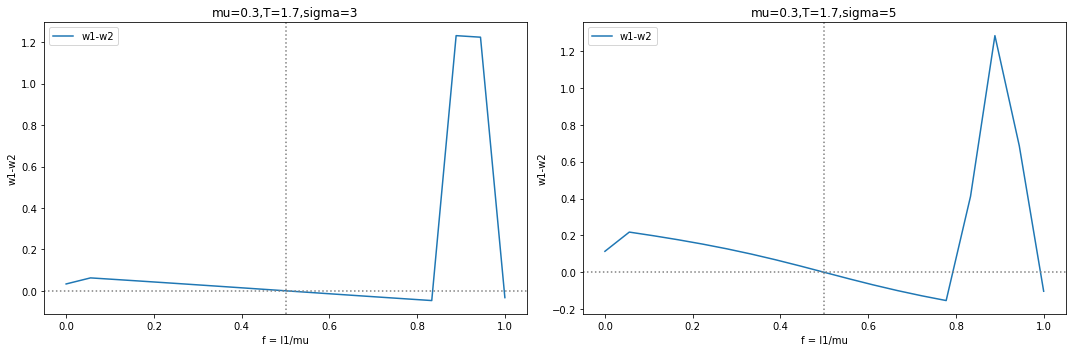

In [7]:
#Defining MU and T

MU = [0.3,0.3]
T =  [1.7,1.7]
sigma = [3,5]

plt.figure(figsize=(15,5))
for i, (mu, t,sig) in enumerate(zip(MU, T,sigma)):
    tau = 1/t
    sigma = 4
    plot_graph(mu, tau, sig, i+1,1,2)
    
plt.tight_layout()
plt.show

<b>Question 4

In [15]:
import pandas as pd
import seaborn as sns

In [16]:
urbanization = pd.read_csv('urbanization-vs-gdp.csv')
urbanization.head()

,Entity,Code,Year,Urban population (%) long-run to 2016 (OWID),GDP per capita,417485-annotations,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1950,6.000,1156.0,NaN,7480464.0,NaN
2,Afghanistan,AFG,1951,6.208,1170.0,NaN,7571542.0,NaN
3,Afghanistan,AFG,1952,6.422,1189.0,NaN,7667534.0,NaN
4,Afghanistan,AFG,1953,6.643,1240.0,NaN,7764549.0,NaN


In [17]:
india_urbanization = urbanization[urbanization['Entity'] == 'India']
india_urbanization.head()

,Entity,Code,Year,Urban population (%) long-run to 2016 (OWID),GDP per capita,417485-annotations,Population (historical estimates),Continent
24251,India,IND,1500,4.4,NaN,NaN,131242704.0,NaN
24252,India,IND,1600,4.6,1264.0,NaN,134992928.0,NaN
24253,India,IND,1700,4.9,1162.0,NaN,164991264.0,NaN
24254,India,IND,1800,6.4,NaN,NaN,200733034.0,NaN
24255,India,IND,1900,10.0,955.0,NaN,291979136.0,NaN


In [18]:
india_urbanization = india_urbanization.sort_values('Year')

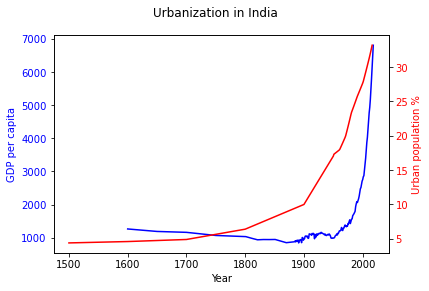

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot with two lineplots and different colors
fig, ax1 = plt.subplots()

sns.lineplot(x = 'Year',y = 'GDP per capita',data=india_urbanization, color='blue', ax=ax1)
ax1.set_ylabel('GDP per capita', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

sns.lineplot(x = 'Year',y = 'Urban population (%) long-run to 2016 (OWID)',data=india_urbanization, color='red', ax=ax2)
ax2.set_ylabel('Urban population %', color='red')
ax2.tick_params(axis='y', labelcolor='red')


plt.suptitle('Urbanization in India')

plt.show()


<b> Question 5

<b>Consider the simple four-node network with adjacency matrix

| A =   |    |    |    |
|-----|----|----|----|
| 0 1 1 0 |    |    |    |
| 1 0 1 1 |    |    |    |
| 1 1 0 0 |    |    |    |
| 0 1 0 0 |    |    |    |


<b>Compute the degree of each node, the degree variance of the network, and the
total connectivity. Is the network connected? How many paths from node 1 to 4, and what is the distance of the shortest one?

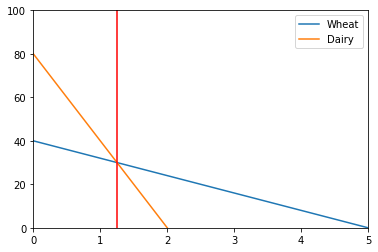

In [38]:
vi

TypeError: unsupported format string passed to numpy.ndarray.__format__

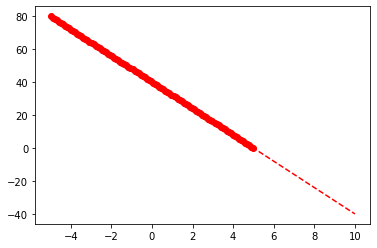

In [27]:
# Calculate the point of intersection between the two lines
R_intersect = (40 - 8 * R) / (40 - 8 - 40)
I_intersect = 40 - 8 * R_intersect

# Add the line of intersection to the plot
plt.plot(R, 40 - 8 * R, 'r--', label='Line of intersection')

# Add a marker at the point of intersection
plt.plot(R_intersect, I_intersect, 'ro', label='Intersection point')

# Add a text label for the intersection point
plt.text(R_intersect, I_intersect, f'({R_intersect:.2f}, {I_intersect:.2f})', ha='center', va='bottom')

# Show the plot with the updated information
plt.legend()
plt.show()


In [39]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


KeyError: 'weight'

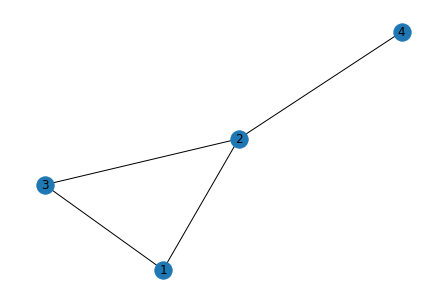

In [41]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(["1", "2", "3", "4"])

# Add edges to the graph
G.add_edges_from([("1", "2"), ("1", "3"), ("2", "3"), ("2", "4")])

# Draw the graph
pos = nx.spring_layout(G) # layout the nodes using spring algorithm
nx.draw(G, pos, with_labels=True) # draw the graph
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): w['weight'] for u, v, w in G.edges(data=True)}) # add edge labels
plt.show() # display the graph


In [ ]:
#Degree of each node

<b>Question 9

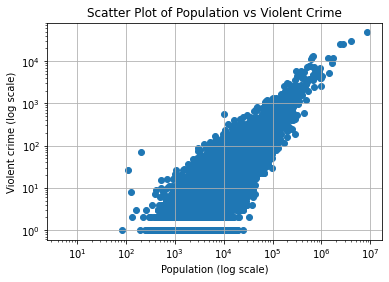

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_excel('Table_8_Offenses_Known_to_Law_Enforcement_by_State_by_City_2019.xls', header=3, usecols="C:D")
plt.scatter(df['Population'], df['Violent\ncrime'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Population (log scale)')
plt.ylabel('Violent crime (log scale)')
plt.title('Scatter Plot of Population vs Violent Crime')
plt.grid(True)
plt.show()

In [81]:
import sympy as sp
x, y, lamda = sp.symbols('x y lamda')
L = 2*sp.sqrt(x) + sp.sqrt(y) - lamda*(2*x + 4*y - 30)
dL_dx = sp.diff(L, x)
print('dl/dx=', dL_dx)
dL_dy = sp.diff(L, y)
print('dl/dy=', dL_dy)
dL_dlamda = sp.diff(L, lamda)
print('dl/dlambda=', dL_dlamda)
sol = sp.solve([dL_dx, dL_dy, dL_dlamda], (x, y, lamda))
print('Solutions for x,y,lambda', sol)

dl/dx= -2*lamda + 1/sqrt(x)
dl/dy= -4*lamda + 1/(2*sqrt(y))
dl/dlambda= -2*x - 4*y + 30
Solutions for x,y,lambda [(40/3, 5/6, sqrt(30)/40)]


Matrix([
[-1/(2*x**(3/2)),               0, -2],
[              0, -1/(4*y**(3/2)), -4],
[             -2,              -4,  0]])

In [98]:
import sympy as sp
af, c = sp.symbols('a_f c')
eq1 = (af/(2*sp.sqrt(c)))*(-200) + sp.sqrt(c)
eq2 = c - (10000 - 200*af)
af_solved = sp.solve([eq1, eq2], [af, c])
sp.pprint(af_solved)

{a_f: 100/3, c: 10000/3}


In [92]:
import math

af = 100/3
c = 10000/3

pf = -100*math.sqrt(3/10000)

print(pf)

-1.7320508075688772


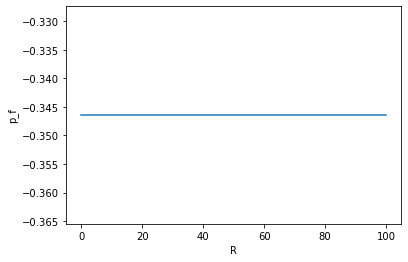

In [103]:
import numpy as np
import matplotlib.pyplot as plt

y = 10000
cT0 = 100
af = 33.33

def find_p_f(R, tol=1e-6, max_iter=100):
    # Initialize p_f
    p_f = 0.01
    
    for i in range(max_iter):
        # Calculate c
        c = y - cT0 * R - p_f * af
        
        # Calculate the next value of p_f
        next_p_f = -(2 * np.sqrt(c) * np.sqrt(af / c)) / af
        
        # Check for convergence
        if abs(next_p_f - p_f) < tol:
            return next_p_f
        
        # Update p_f for the next iteration
        p_f = next_p_f
    
    # If max_iter is reached without convergence, return None
    return None

# Test the solver for a range of R values
R_values = np.linspace(0, 200, 1000)
p_f_values = [find_p_f(R) for R in R_values]

# Plot the results
plt.plot(R_values, p_f_values)
plt.xlabel('R')
plt.ylabel('p_f')
plt.show()


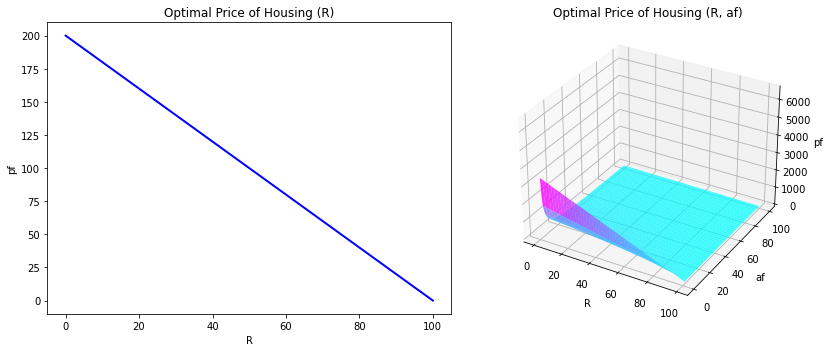

In [104]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# First plot: pf as a function of R
R = np.linspace(0, 100, 1000)
pf1 = 200 - 2*R

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(R, pf1, color='blue', linewidth=2)
ax1.set_xlabel('R')
ax1.set_ylabel('pf')
ax1.set_title('Optimal Price of Housing (R)')

# Second plot: pf as a function of R and af
R, af = np.meshgrid(np.linspace(0, 100, 100), np.linspace(0, 100, 100))
pf2 = (20000 - 200*R)/(3*af)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(R, af, pf2, cmap='cool', alpha=0.8)
ax2.set_xlabel('R')
ax2.set_ylabel('af')
ax2.set_zlabel('pf')
ax2.set_title('Optimal Price of Housing (R, af)')

# Customize the subplots
plt.tight_layout()
plt.show()
